<a href="https://colab.research.google.com/github/jonathanfrawley/data_analysis_and_machine_learning_course/blob/master/src/analysis_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd

# From: https://www.kaggle.com/carolzhangdc/imdb-5000-movie-dataset/data
#url = "https://data.yorkopendata.org/dataset/d2251771-3ea7-4bf2-ba5c-2d036df573b4/resource/0db2940c-0d57-48b4-a50c-be05e3ab0e37/download/kpi-hlth05a.csv"
url = "https://raw.githubusercontent.com/jonathanfrawley/data_analysis_and_machine_learning_course/master/data/movie_metadata.csv"
c = pd.read_csv(url)

In [3]:
c

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,11700,Stephanie Sigman,1.0,bomb|espionage|sequel|spy|terrorist,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,0.0,deception|imprisonment|lawlessness|police offi...,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,Doug Walker,Star Wars: Episode VII - The Force Awakens ...,8,143,NaN,0.0,NaN,http://www.imdb.com/title/tt5289954/?ref_=fn_t...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5038,Color,Scott Smith,1.0,87.0,2.0,318.0,Daphne Zuniga,637.0,NaN,Comedy|Drama,Eric Mabius,Signed Sealed Delivered,629,2283,Crystal Lowe,2.0,fraud|postal worker|prison|theft|trial,http://www.imdb.com/title/tt3000844/?ref_=fn_t...,6.0,English,Canada,NaN,NaN,2013.0,470.0,7.7,NaN,84
5039,Color,NaN,43.0,43.0,NaN,319.0,Valorie Curry,841.0,NaN,Crime|Drama|Mystery|Thriller,Natalie Zea,The Following,73839,1753,Sam Underwood,1.0,cult|fbi|hideout|prison escape|serial killer,http://www.imdb.com/title/tt2071645/?ref_=fn_t...,359.0,English,USA,TV-14,NaN,NaN,593.0,7.5,16.00,32000
5040,Color,Benjamin Roberds,13.0,76.0,0.0,0.0,Maxwell Moody,0.0,NaN,Drama|Horror|Thriller,Eva Boehnke,A Plague So Pleasant,38,0,David Chandler,0.0,NaN,http://www.imdb.com/title/tt2107644/?ref_=fn_t...,3.0,English,USA,NaN,1400.0,2013.0,0.0,6.3,NaN,16
5041,Color,Daniel Hsia,14.0,100.0,0.0,489.0,Daniel Henney,946.0,10443.0,Comedy|Drama|Romance,Alan Ruck,Shanghai Calling,1255,2386,Eliza Coupe,5.0,NaN,http://www.imdb.com/title/tt2070597/?ref_=fn_t...,9.0,English,USA,PG-13,NaN,2012.0,719.0,6.3,2.35,660


How many films has Steven Spielberg directed?

In [150]:
spielberg_films = c[c['director_name'] == 'Steven Spielberg']
len(spielberg_films)

26

What is Steven Spielberg's highest grossing film?

In [151]:
spielberg_films.sort_values('gross', ascending=False).iloc[0]['movie_title'].strip()

'E.T. the Extra-Terrestrial'

Graphing how much money Steven Spielberg films have made over time:

In [0]:
#ts = spielberg_films.loc['title_year', 'gross']
spielberg_films = spielberg_films.dropna(how='any')

import matplotlib.pyplot as plt
plt.close('all')
#ts = spielberg_films[['title_year', 'gross']]
spielberg_films['title_year'] = spielberg_films['title_year'].astype('int32')
spielberg_films['gross'] = spielberg_films['gross'].astype('int32')
spielberg_films = spielberg_films.sort_values('title_year')
#spielberg_films.plot.bar(x='title_year', y='gross', style='o')
#ts.plot()
#spielberg_films['gross'] = spielberg_films[spielberg_films['gross'].notnull()]



In [157]:
spielberg_films_by_title_year = spielberg_films.groupby('title_year').sum()
spielberg_films_by_title_year

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
title_year,,,,,,,,,,,,,,,
1975,385.0,130.0,14000.0,366.0,813.0,260.000000,412454,2047,0.0,962.0,8000000.0,559.0,8.0,2.35,21000
1977,171.0,135.0,14000.0,252.0,559.0,128.300000,139288,1591,0.0,339.0,19400870.0,481.0,7.7,2.35,0
1981,234.0,115.0,14000.0,488.0,11000.0,242.374454,661017,12906,1.0,771.0,18000000.0,783.0,8.5,2.35,16000
1982,215.0,120.0,14000.0,548.0,861.0,434.949459,281842,2811,0.0,515.0,10500000.0,725.0,7.9,1.85,34000
1984,148.0,118.0,14000.0,237.0,11000.0,179.870271,329969,11898,2.0,524.0,28000000.0,429.0,7.6,2.35,0
1985,70.0,154.0,14000.0,271.0,852.0,94.175854,60988,2592,0.0,199.0,15000000.0,581.0,7.8,1.85,6000
1989,149.0,127.0,14000.0,440.0,11000.0,197.171806,515306,12884,5.0,477.0,48000000.0,844.0,8.3,2.35,0
1991,75.0,142.0,14000.0,5000.0,49000.0,119.654900,182802,64259,1.0,363.0,70000000.0,8000.0,6.7,2.35,13000
1993,482.0,312.0,28000.0,403.0,14967.0,452.851179,1478493,17362,0.0,2168.0,85000000.0,1405.0,17.0,3.70,60000


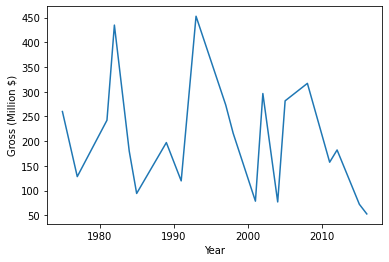

In [159]:
# Convert to units of millions of dollars
spielberg_films['gross'] = spielberg_films['gross'] / 1000000

import matplotlib.pyplot as plt
plt.plot(spielberg_films_by_title_year.index, spielberg_films_by_title_year['gross'])
plt.xlabel('Year')
plt.ylabel('Gross (Million $)')
plt.ticklabel_format(style='plain')
plt.show()

Maybe we could make it look a bit better by smoothing the data a bit?

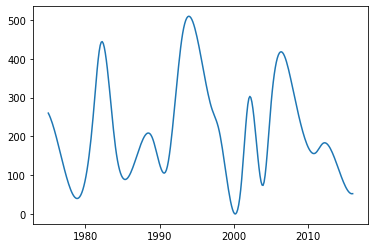

In [161]:
from scipy.interpolate import make_interp_spline, BSpline
import numpy as np

x = spielberg_films_by_title_year.index.to_numpy()
y = spielberg_films_by_title_year['gross'].to_numpy()

xnew = np.linspace(x.min(), x.max(), 300) 
spl = make_interp_spline(x, y, k=3)  # type: BSpline
power_smooth = spl(xnew)

plt.plot(xnew, power_smooth)
plt.show()

## Your turn!
Can you solve the following challenges?

What is, the director, David Lynch's highest grossing film?

In [0]:
# TODO
def highest_grossing_david_lynch_film():
    # ...

In [0]:
# ANSWER
def highest_grossing_david_lynch_film():
    return c[c['director_name'] == 'David Lynch'].sort_values('gross', ascending=False)['movie_title'].iloc[0].strip()


In [0]:
assert(highest_grossing_david_lynch_film() == 'Dune')